# EDS-220 Homework 4
### By Amanda Overbye

Github [link](https://github.com/Aoverbye/eds220-hwk4)

Github URL: https://github.com/Aoverbye/eds220-hwk4

In [4]:
# Import Libraries
import pandas as pr 
import os
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd


In [35]:
fp = os.path.join('/courses/EDS220/data/hwk4_landsat_data/landsat8-2018-01-26-sb-simplified.nc')

landsat = rioxr.open_rasterio(fp)

print(landsat)
print(landsat.data_vars)

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...
Data variables:
    red      (band, y, x) float64 5MB ...
    green    (band, y, x) float64 5MB ...
    blue     (band, y, x) float64 5MB ...
    nir08    (band, y, x) float64 5MB ...
    swir22   (band, y, x) float64 5MB ...


   YEAR_ STATE AGENCY UNIT_ID FIRE_NAME   INC_NUM  ALARM_DATE   CONT_DATE  \
0   2017    CA    USF     VNC    THOMAS  00003583  2017-12-04  2018-01-12   

   CAUSE  C_METHOD  OBJECTIVE  GIS_ACRES                    COMMENTS  \
0      9         7          1   281791.0  CONT_DATE based on Inciweb   

  COMPLEX_NA IRWINID FIRE_NUM COMPLEX_ID  DECADES  \
0       None    None     None       None     2010   

                                            geometry  
0  MULTIPOLYGON (((-13316089.016 4088553.040, -13...  


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

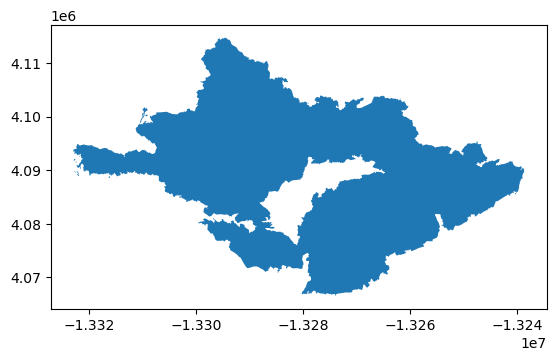

In [62]:
fp = os.path.join('/', 'Users', 'overbye', 'MEDS', 'EDS-220', 'eds220-hwk4', 'data', 'thomas_fire_shape', 'thomas_fire_shapefile.shp' )

thomas_fire_shape = gpd.read_file(fp)

print(thomas_fire_shape)

thomas_fire_shape.plot()

thomas_fire_shape.crs

In [38]:
# Remove extra dimensions
landsat = landsat.squeeze()

# Drop 'band'
landsat = landsat.drop_vars('band')

ValueError: These variables cannot be found in this dataset: ['band']

In [39]:
print(landsat.dims)

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731})


ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

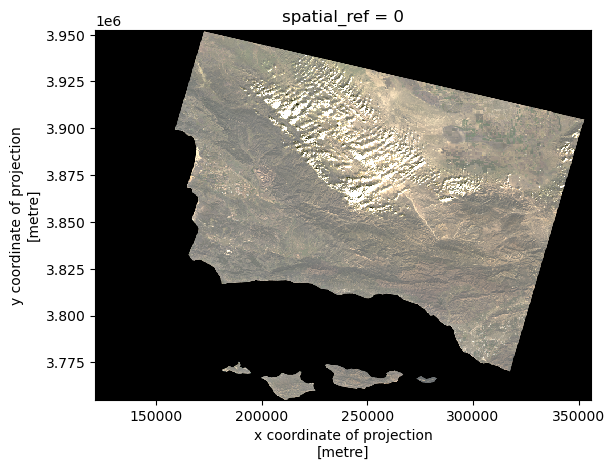

In [48]:
# Select 'red' 'green' and 'blue' bands
rgb_bands = landsat[['red', 'green', 'blue']]

# Convert to a NumPy array using .to_array()
rgb_array = rgb_bands.to_array()

# Plot the RGB image
rgb_array.plot.imshow(robust=True)

AttributeError: 'Dataset' object has no attribute 'crs'

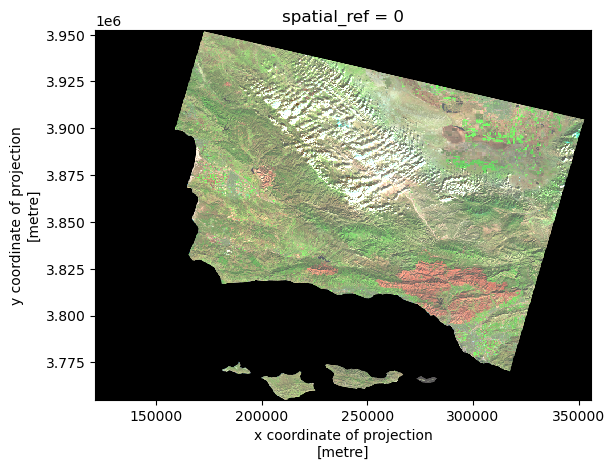

In [63]:
# Select SWIR, NIR, and Red bands
false_color_bands = landsat[['swir22', 'nir08', 'red']]

# Convert to NumPy array
false_color_array = false_color_bands.to_array()

# Plot the false color image
false_color_array.plot.imshow(robust=True)


In [67]:
print("Landsat CRS:", landsat.rio.crs)
print("Thomas Fire CRS:", thomas_fire_shape.crs)

if thomas_fire_shape.crs != landsat.rio.crs:
    thomas_fire_shape = thomas_fire_shape.to_crs(landsat.rio.crs)

Landsat CRS: EPSG:32611
Thomas Fire CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


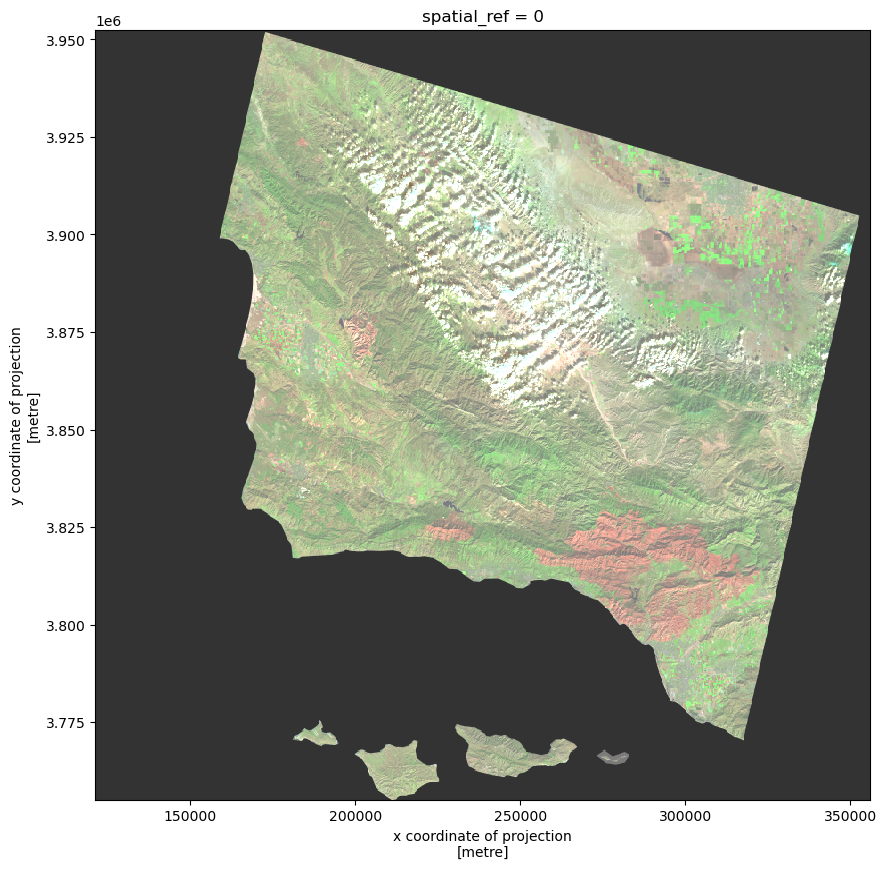

In [68]:
# Plot False Color Image
fig, ax = plt.subplots(figsize=(10, 10))
false_color_image = landsat[['swir22', 'nir08', 'red']].to_array()
false_color_image.plot.imshow(ax=ax, robust=True, alpha=0.8)



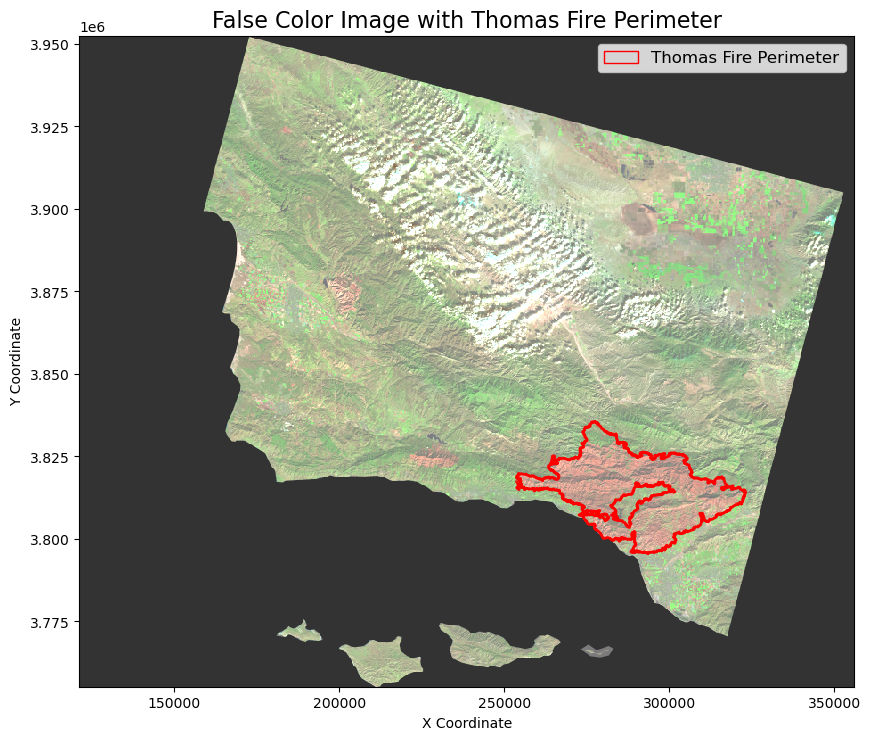

In [69]:
import matplotlib.patches as mpatches

# Plot False Color Image
fig, ax = plt.subplots(figsize=(10, 10))
false_color_image = landsat[['swir22', 'nir08', 'red']].to_array()
false_color_image.plot.imshow(ax=ax, robust=True, alpha=0.8)

# Plot Thomas Fire perimeter
thomas_fire_shape.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

# Create a custom legend
fire_legend = mpatches.Patch(edgecolor='red', facecolor='none', label="Thomas Fire Perimeter")

# Add legend manually
ax.legend(handles=[fire_legend], loc="upper right", fontsize=12)

# Customize the map
ax.set_title("False Color Image with Thomas Fire Perimeter", fontsize=16)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")

plt.show()
